In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [25]:
data=pd.read_excel("amazon.xlsx",thousands = '.')

In [26]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [27]:
data.shape

(6454, 5)

In [29]:
data.describe(include= "all")

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2016-01-01 00:00:00
freq,NaN,717,541,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.461729,NaN,NaN,108.293163,NaN
std,5.746654,NaN,NaN,190.812242,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,3.000000,NaN


In [30]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [33]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [34]:
data2.describe(include="all")

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01 00:00:00
freq,NaN,661,534,NaN,317
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.834847,NaN,NaN,119.740290,NaN
std,5.649076,NaN,NaN,197.199644,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,6.000000,NaN


In [41]:
forest_fire_per_month = data2.groupby('month')['number'].sum()

In [40]:
print(forest_fire_per_month)

month
Abril        28188.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30848.050
Janeiro      47747.844
Julho        92326.113
Junho        56010.675
Maio         34731.363
Março        30717.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64


In [43]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0) 

In [44]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [45]:
forest_fire_per_month.head()

,number
month,
Janeiro,47747.844
Fevereiro,30848.050
Março,30717.405
Abril,28188.770
Maio,34731.363


In [46]:
forest_fire_per_month.reset_index(level=0, inplace=True)
forest_fire_per_month.head()

,month,number
0,Janeiro,47747.844
1,Fevereiro,30848.050
2,Março,30717.405
3,Abril,28188.770
4,Maio,34731.363


[None, None, None, None, None, None, None, None, None, None, None, None]

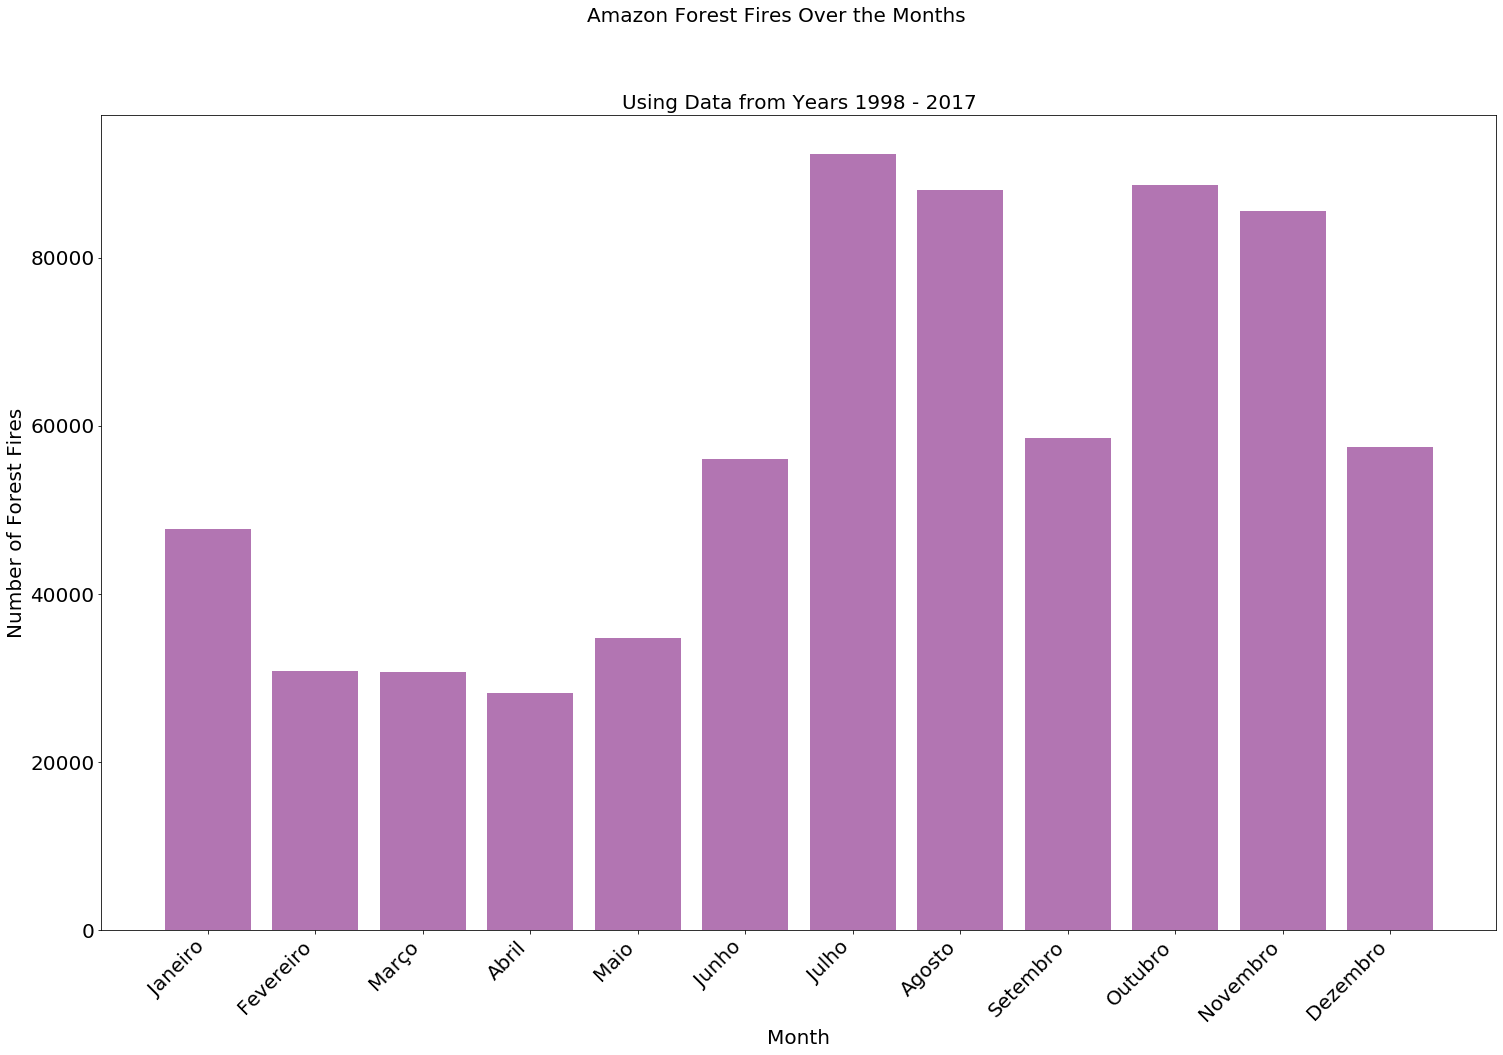

In [58]:
plt.figure(figsize=(25, 15)) 
plt.bar(forest_fire_per_month['month'],forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 
#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)
plt.setp(plt.gca().get_yticklabels(), fontsize=20)
